In [1]:
import tensorflow as tf
from tf.keras import layers, models
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape to (batch, height, width, channels)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Class names for reference
class_names = ['T-shirt', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),

    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(10, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

In [4]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [5]:
history = model.fit(
    x_train, y_train,
    epochs=10,
    validation_split=0.2,
    batch_size=64
)


Epoch 1/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7023 - loss: 0.8268 - val_accuracy: 0.8596 - val_loss: 0.3791
Epoch 2/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 38s 50ms/step - accuracy: 0.8654 - loss: 0.3759 - val_accuracy: 0.8838 - val_loss: 0.3228
Epoch 3/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.8792 - loss: 0.3231 - val_accuracy: 0.8936 - val_loss: 0.2919
Epoch 4/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 49ms/step - accuracy: 0.8912 - loss: 0.2930 - val_accuracy: 0.8928 - val_loss: 0.2857
Epoch 5/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.9019 - loss: 0.2629 - val_accuracy: 0.9033 - val_loss: 0.2589
Epoch 6/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9080 - loss: 0.2400 - val_accuracy: 0.9024 - val_loss: 0.2625
Epoch 7/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9140 - loss: 0.2289 - val_accuracy: 0.9023 - val_loss: 0.2608
Epoch 8/10
750/750 ━━━━━━━━━━━━━━━━━━━━ 37s 49ms/step - accuracy: 0.9218 - loss: 0.2097 - 

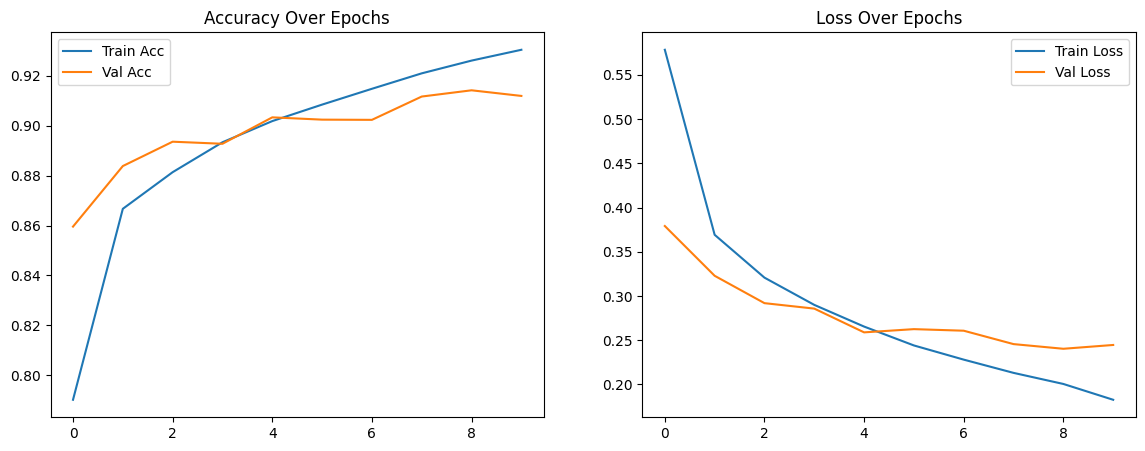

In [6]:
plt.figure(figsize=(14,5))

# Accuracy plot
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy Over Epochs")
plt.legend()

# Loss plot
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss Over Epochs")
plt.legend()

plt.show()


In [7]:
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print("Test Accuracy:", test_acc)


313/313 - 3s - 10ms/step - accuracy: 0.9055 - loss: 0.2602
Test Accuracy: 0.9054999947547913


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
              precision    recall  f1-score   support

     T-shirt       0.84      0.86      0.85      1000
     Trouser       0.99      0.98      0.98      1000
    Pullover       0.85      0.86      0.86      1000
       Dress       0.90      0.93      0.91      1000
        Coat       0.89      0.81      0.85      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.72      0.73      0.72      1000
     Sneaker       0.93      0.99      0.96      1000
         Bag       0.97      0.98      0.98      1000
  Ankle Boot       0.99      0.93      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



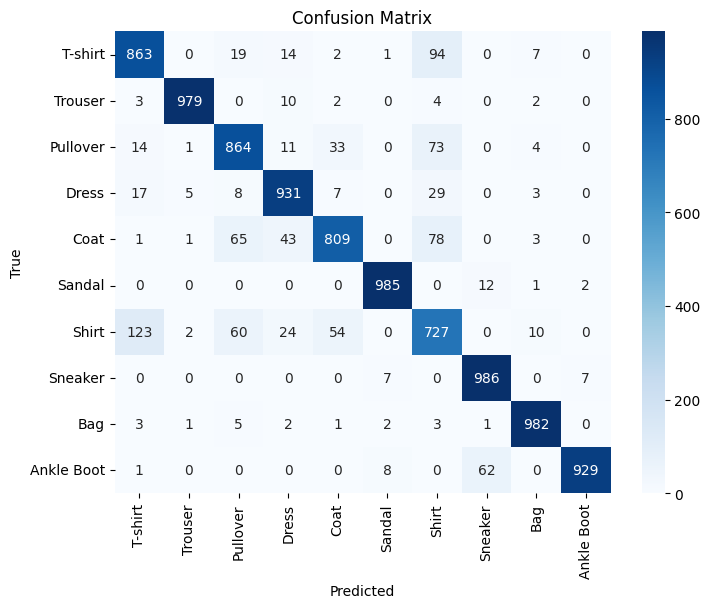

In [8]:
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print(classification_report(y_test, y_pred_classes, target_names=class_names))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred_classes)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()


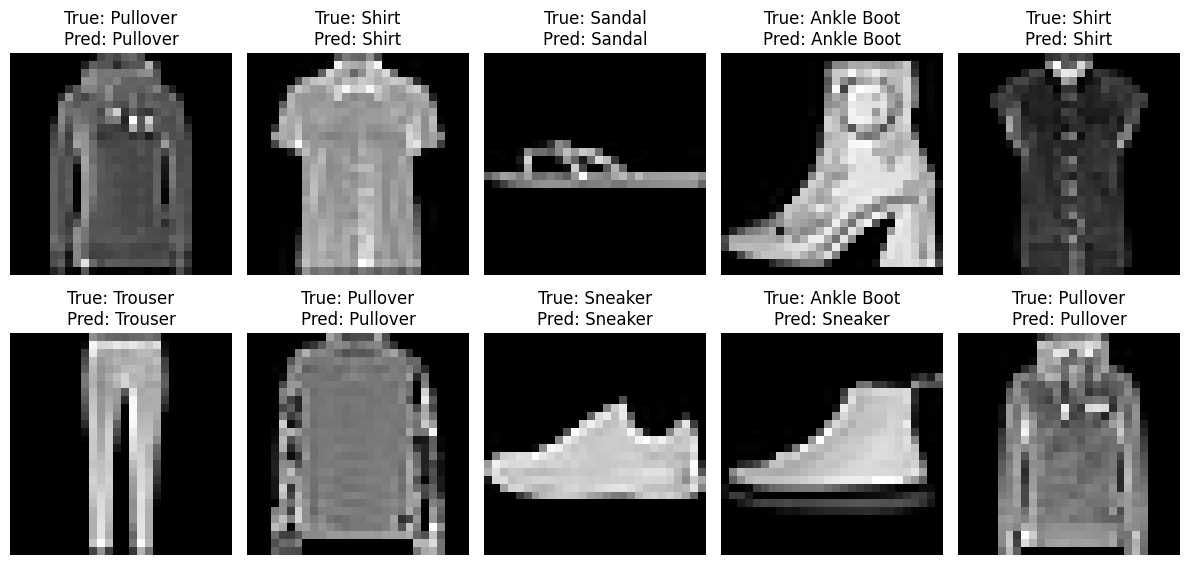

In [9]:
import random

plt.figure(figsize=(12,6))
for i in range(10):
    idx = random.randint(0, len(x_test)-1)
    plt.subplot(2,5,i+1)
    plt.imshow(x_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {class_names[y_test[idx]]}\nPred: {class_names[y_pred_classes[idx]]}")
    plt.axis('off')

plt.tight_layout()
plt.show()
